## Imports

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

%cd /content/drive/MyDrive/GRM_proj/

Mounted at /content/drive
/content/drive/MyDrive/GRM_proj


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

In [ ]:
import graph_cut as gc

## Data

Image shape :  (128, 128, 3)


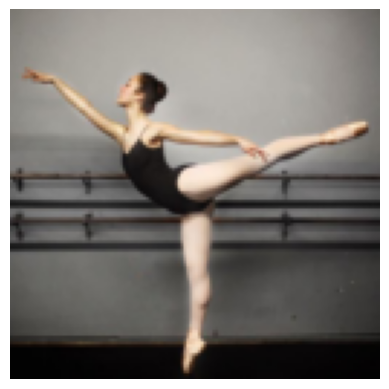

In [3]:
from PIL import Image
import torch
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 512 if torch.cuda.is_available() else 128
loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])

def image_loader(image_name):
    image = Image.open(image_name)
    image =  loader(image).unsqueeze(0).to(device, torch.float)[:, :3][0]
    image = image.cpu().numpy().transpose(1,2,0)
    return image

content_img = image_loader("data/images/dance2.png")

print("Image shape : ",content_img.shape)

plt.imshow(content_img)
plt.axis('off');

In [4]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

content_img_flat = content_img.reshape((-1,3))
print("Flat image shape : ",content_img_flat.shape)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(content_img_flat)

Flat image shape :  (16384, 3)


Clustered image shape :  (128, 128)


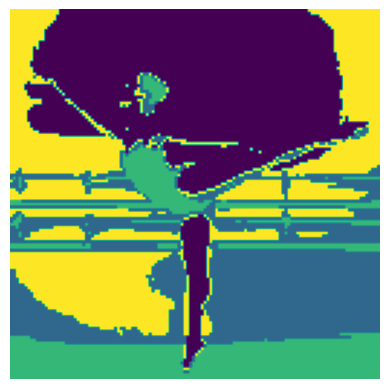

In [5]:
cluster_labels = kmeans.labels_.reshape(content_img.shape[:2])
print("Clustered image shape : ",cluster_labels.shape)

plt.imshow(cluster_labels)
plt.axis('off')
plt.show()

Cluster centers shape :  (4, 3)
Distance array shape :  (4, 128, 128)
Distance image shape :  (128, 128)


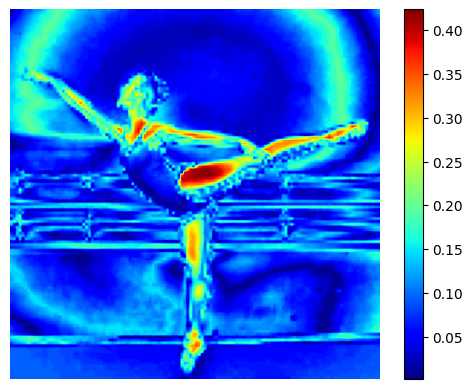

In [6]:
cluster_centers = kmeans.cluster_centers_
print("Cluster centers shape : ",cluster_centers.shape)

# Compute distance array
distance_array = np.zeros((n_clusters,imsize,imsize), dtype=np.float32)
distance_img = np.zeros_like(cluster_labels,dtype=np.float32)
print("Distance array shape : ",distance_array.shape)
print("Distance image shape : ",distance_img.shape)

for i, cluster_center in enumerate(cluster_centers):
    distances = np.linalg.norm(content_img - cluster_center, axis=2)
    distance_array[i] = distances
    mask = (cluster_labels == i)
    distance_img[mask] = np.linalg.norm(content_img[mask] - cluster_center, axis=1)

# Plot distance array as an image
plt.imshow(distance_img.reshape((imsize,imsize)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

## Stochastic assignments

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


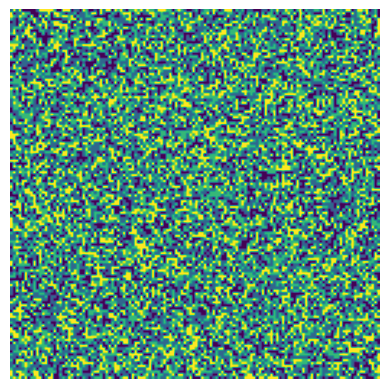

  0%|          | 0/10000 [00:00<?, ?it/s]

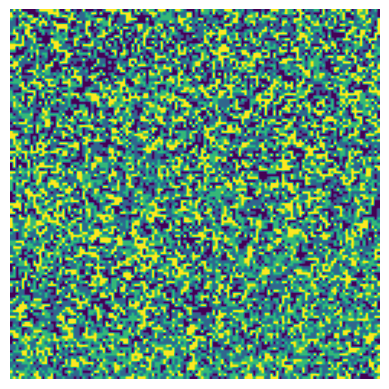

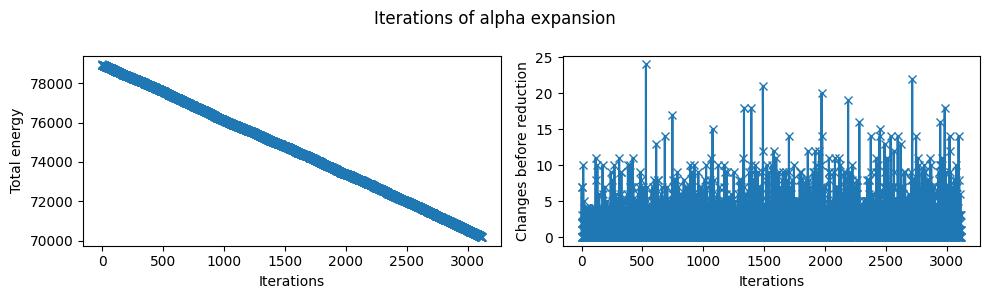

In [7]:
# Example usage
image = content_img
height, width, K = imsize, imsize, n_clusters
beta = 1
max_iter = 10000

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion_stochastic(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

## Greedy assignments

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


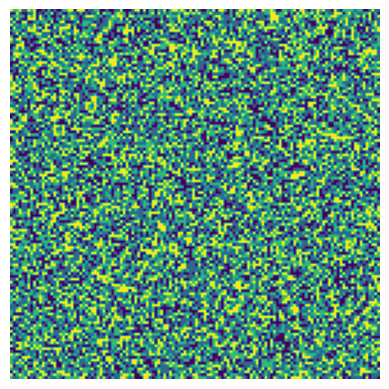

  0%|          | 0/2000 [00:00<?, ?it/s]

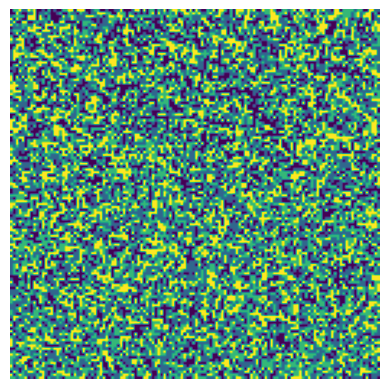

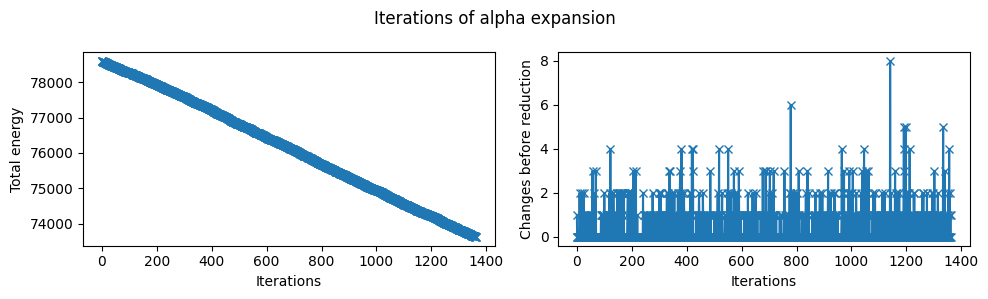

In [15]:
image = content_img
height, width, K = imsize, imsize, n_clusters
beta = 1
max_iter = 2000

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion_greedy(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

## Alpha expansion

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


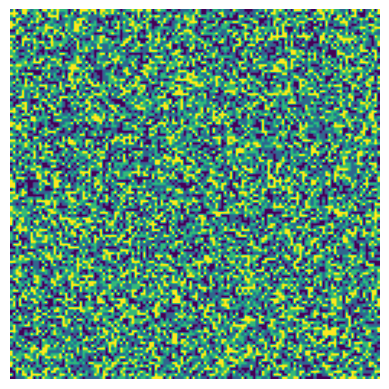

  0%|          | 0/10 [00:00<?, ?it/s]

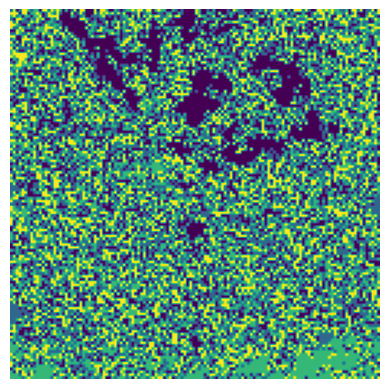

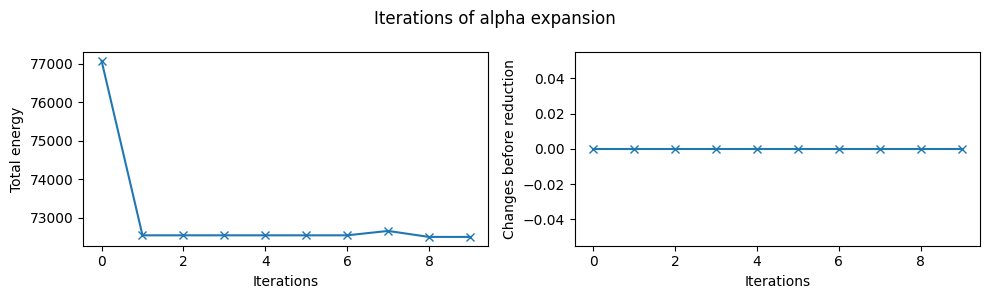

In [16]:
image = content_img
height, width, K = imsize, imsize, n_clusters
beta = 1
max_iter = 10

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


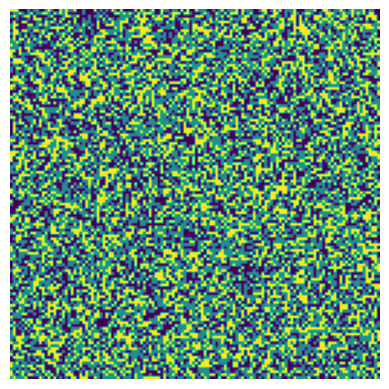

  0%|          | 0/10 [00:00<?, ?it/s]

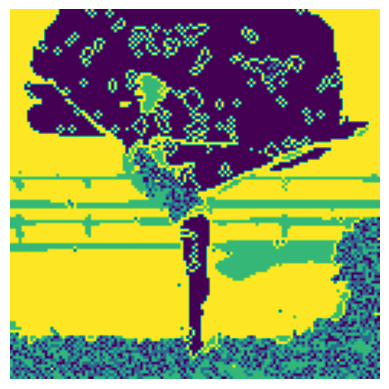

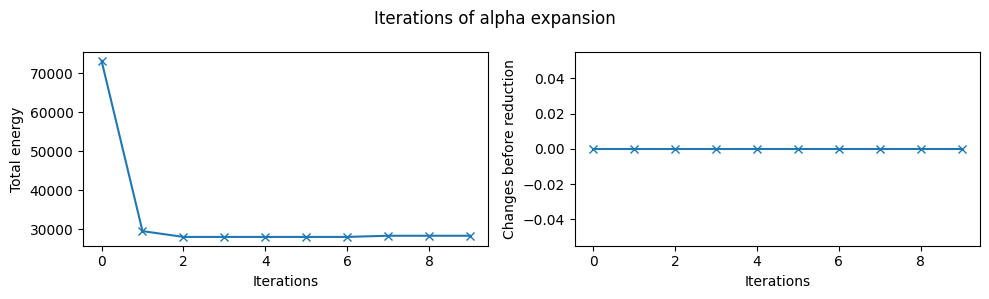

In [18]:
image = content_img
height, width, K = imsize, imsize, 3
beta = 1
max_iter = 10

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


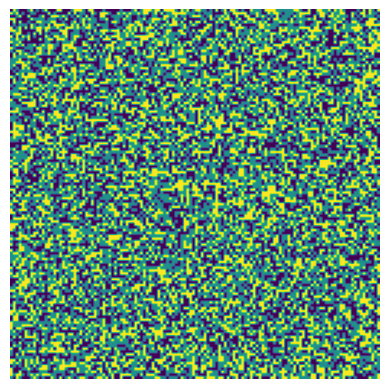

  0%|          | 0/20 [00:00<?, ?it/s]

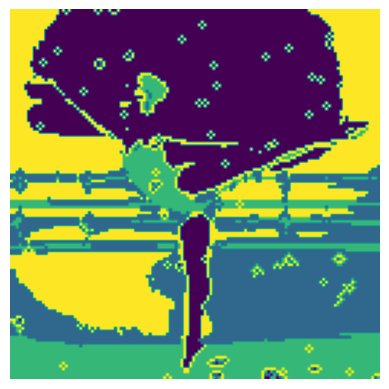

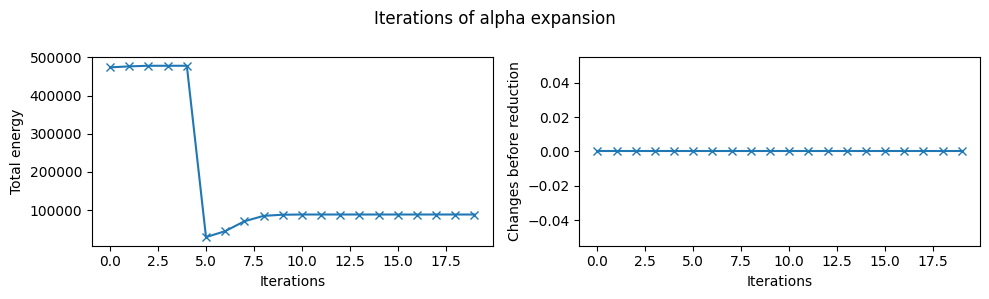

In [24]:
image = content_img
height, width, K = imsize, imsize, 3
beta = 10
max_iter = 20

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


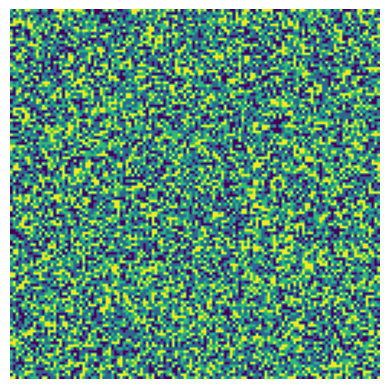

  0%|          | 0/20 [00:00<?, ?it/s]

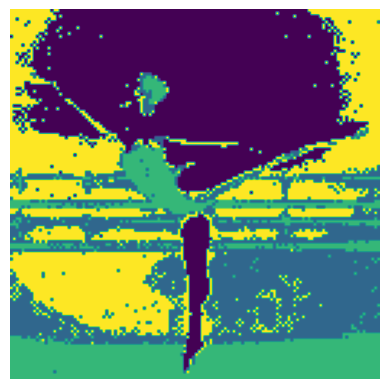

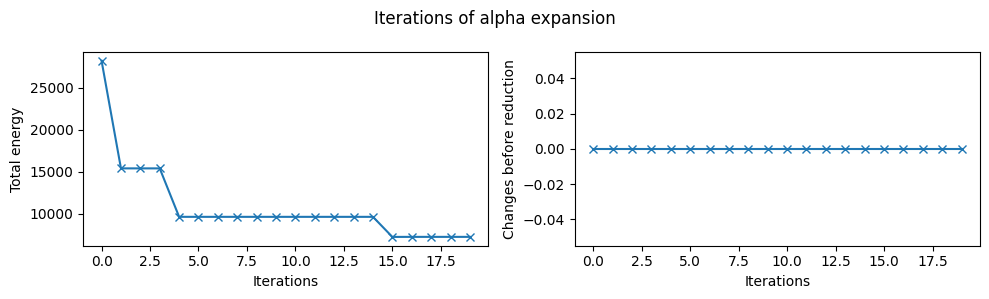

In [30]:
image = content_img
height, width, K = imsize, imsize, n_clusters
beta = 1e-1
max_iter = 20

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

Image shape :  (128, 128, 3)
Distance shape :  (128, 128, 4)
Assignement shape :  (128, 128)


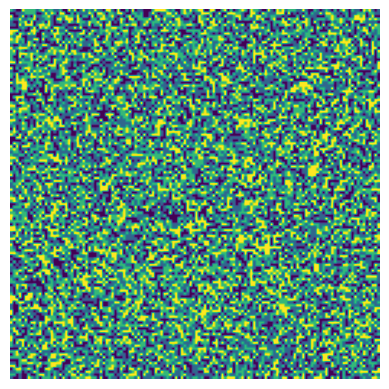

  0%|          | 0/100 [00:00<?, ?it/s]

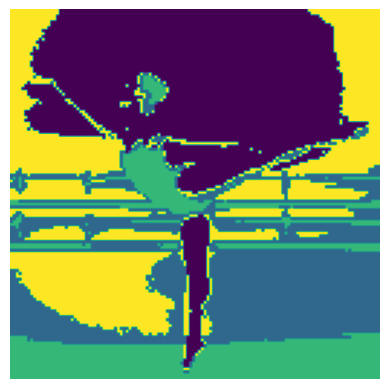

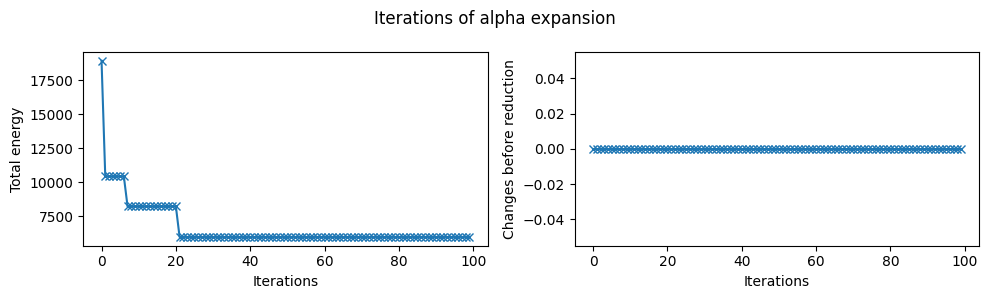

In [33]:
image = content_img
height, width, K = imsize, imsize, n_clusters
beta = 1e-2
max_iter = 100

print("Image shape : ",image.shape)

distances = distance_array.transpose(1,2,0)
assignments = np.random.randint(0, K, (height, width))
print("Distance shape : ",distances.shape)
print("Assignement shape : ",assignments.shape)
plt.imshow(assignments)
plt.axis('off')
plt.show()

assignments, energies, fail_counts = gc.alpha_expansion(distances, assignments, max_iter=max_iter, beta=beta)
plt.imshow(assignments)
plt.axis('off')
plt.show()
gc.plot_energy(energies, fail_counts)

## Pymaxflow aexpansion

In [11]:
!pip install PyMaxFlow

Done in 0.07071664800014332 s


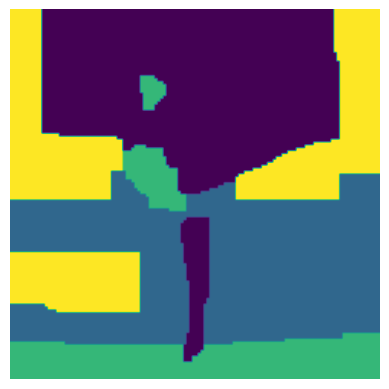

In [23]:
from maxflow.fastmin import aexpansion_grid

smooth_term = beta * (1 - np.eye(n_clusters))
data_term = distances.copy().astype(np.double)

t1 = perf_counter()
labels = aexpansion_grid(data_term, smooth_term, max_cycles=None)
t2 = perf_counter()
print(f"Done in {(t2-t1)} s")

plt.imshow(labels)
plt.axis('off')
plt.show()